# Creating A Custom Geocoding Application 

This notebook provides source code and example usage when implementing a custom Geocoder to provide locations of addresses. This Notebook then covers the _Episode 3_ of the session which is being covered on [African Surveyors Connect YouTube Channel](https://youtube.com/africansurveyorsconnect/)


### Series Brief 

- [Episode One](https://www.youtube.com/watch?v=kkrl7MdPqcg&t=1187s) covered the basics of building a Locator tool using ArcGIS Desktop. 

Health facility data for Zimbabwe was used for this demonstration. 

- [Episode Two](https://www.youtube.com/watch?v=FmpmhLBC_gc) demonstrated the process of deploying our Locator tool as a Geocoding Service onto an ArcGIS Server. 

- [Episode Three]() which this notebook provides source-code for, will demonstrate a usage case of our geocoder while it provides coordinates and additional information to the user. 

**Please Note** _Some portions of this tutorial have been hidden from the audience to protect certain properties of the resources utilized to create this tutorial. Where secrets have been used, I provide explanation as to how you can overcome the obstacle_


## Importing & Keeping Secrets. 

- let's import the `GIS` and `geocoding` functions which we essentially need for this process to occur. 
- then we are going to hide some secrets which unauthorised users might tend to abuse. 
- finally we authenticate ourselves (give ourselves permission to use ArcGIS Online). 


In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders, geocode

# Some secrets you are not supposed to see
from dotenv import load_dotenv
load_dotenv()
import os

# Auth
gis = GIS(username=os.environ.get('ARCGIS_USERNAME'), password=os.environ.get('ARCGIS_PASSWORD'))

Call the `get_geocoders` function to visualize what geocoders we currently have within our ArcGIS Online. 

I currently have 2, a custom geocoder and the default *ESRI World GeocodeServer*. 

**Remove the `[0]` to display everything you have**. 

In [2]:
get_geocoders(gis)[0] #<- I choose to show only the first result, the other one is confidential. Remove [0] on your end

<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">

Let the portal know, we want to use our custom geocoding URL for this exercise. 

*Refer to [Episode Two](https://www.youtube.com/watch?v=FmpmhLBC_gc) and grab the **REST URL** of your Geocoding Service within your ArcGIS Server* 

The result should be your REST URL after running the cell. 

In [ ]:
geocoder_url = os.environ.get('HEALTH_GEOCODER_URL')
health_geocoder = Geocoder(geocoder_url, gis)
health_geocoder

Use the Geocoder to get information about an address. Return all the parameters at this point

In [4]:
results = geocode('Harare Hospital', geocoder=health_geocoder)
results

[{'address': 'Harare',
  'location': {'x': 31.0128, 'y': -17.8609},
  'score': 100,
  'attributes': {'Status': 'T',
   'Score': 100,
   'Match_addr': 'Harare',
   'LongLabel': 'Harare, ZWE',
   'ShortLabel': 'Harare',
   'Addr_type': 'POI',
   'Type': 'Hospital',
   'PlaceName': 'Harare',
   'Place_addr': 'Harare',
   'Phone': '',
   'URL': '',
   'Rank': 20,
   'AddBldg': '',
   'AddNum': '',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': '',
   'StPreDir': '',
   'StPreType': '',
   'StName': '',
   'StType': '',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': '',
   'Block': '',
   'Sector': '',
   'Nbrhd': '',
   'District': 'Harare',
   'City': '',
   'MetroArea': '',
   'Subregion': '',
   'Region': '',
   'RegionAbbr': '',
   'Territory': '',
   'Zone': '',
   'Postal': '',
   'PostalExt': '',
   'Country': 'ZWE',
   'LangCode': 'ENG',
   'Dis

Just display the **Coordinates** only. 

In [5]:
results[0]['location']

{'x': 31.0128, 'y': -17.8609}

#### What is the default Spatial Reference for our Geocoder? 

return the `wkid` for the Spatial Reference

In [6]:
health_geocoder.properties.spatialReference

{
  "wkid": 4326,
  "latestWkid": 4326
}

Try to get the *Coordinates* in another Spatial Reference perhaps? 

In [7]:
result_change_sr = geocode('Harare Hospital', geocoder=health_geocoder, out_sr=20936)
result_change_sr[0]['location']

{'x': 289428.2753462425, 'y': 8024383.626386837}

#### What are the properties of our Locator? 

Return the properties of our Locator service

In [8]:
health_geocoder.properties.locatorProperties

{
  "MinimumCandidateScore": 70,
  "UICLSID": "{AE5A3A0E-F756-11D2-9F4F-00C04F8ED1C4}",
  "MinimumMatchScore": 75,
  "SuggestedBatchSize": 1000,
  "MaxBatchSize": 1000,
  "LoadBalancerTimeOut": 60,
  "isAGOWorldLocator": false,
  "LocatorVersion": "11.0"
}

### Plot Result on a Map? 

Yes, we can also use the `JSON` response we get from the **Locator** to plot this on a map. 

[Subscribe](https://youtube.com/africansurveyorsconnect?sub_confirmation=1) to YouTube channel and stay posted for more. 

In [9]:
from IPython.display import YouTubeVideo

Consider watching these videos too 😉👍

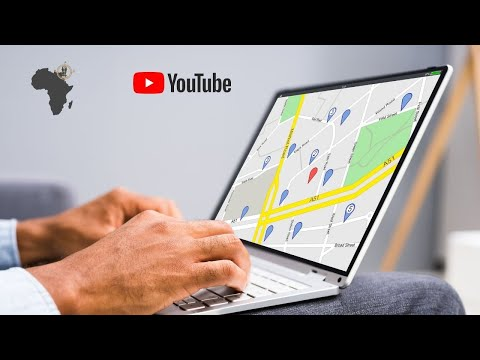

In [10]:
YouTubeVideo('kkrl7MdPqcg', width=800, height=300)

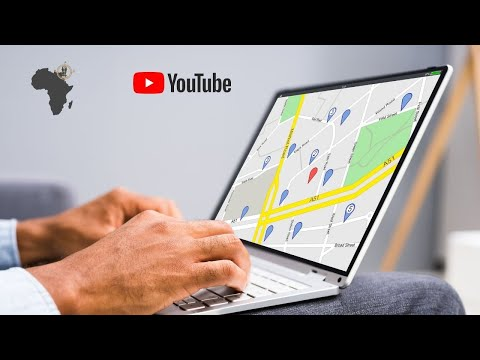

In [11]:

YouTubeVideo('FmpmhLBC_gc', width=800, height=300)